<a href="https://colab.research.google.com/github/husfuu/Mathematical-Modelling/blob/main/Numerical%20Method/solve%20ordinary%20differential%20equation/Adams_Bashfort_4steps_predictor_corrector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solve ODE | Adams-Bashforth Predictor-Corrector Method

### Formula

predictor : $$ y^*_{r+1} = y_r + \frac{h}{24} (55f'_r - 59 f'_{r-1} + 37 f'_{r-2} -9 f_{r-3})$$

korektor : $$ y_{r+1} = y_r + \frac{h}{24} (9f^{'*}_{r+1} + 19 f'_r - 5f_{r-1} + f_{r-2})$$

### Problem

* In this case we'll use this differential equation:
$$ y' = y + x^2 + 1 $$

* this equation has the following exact solution:
$$ y = 4e^x -x^2 - 2x - 3 $$

* objective:
 we will approximate the exact solution using the Adams-Bashfort 4 steps method and also the predictor-Corrector method. 

## Setup 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Ordinary Differential Equation

In [2]:
def dydx(x, y):
  return y + x**2 + 1

## Exact Solution

In [4]:
def analytic(x):
    """[get the solution from exact solution that we got from analytic]

    Args:
        x ([array 1 dimension]): [data that we want to observe]

    Returns:
        [array 1 dimension]: [the result analytic]
    """
    N = len(x)
    y_analytics = np.array([])

    for i in range(N):
      y_i_analytic = 4*np.exp(x[i]) - x[i]**2 - 2*x[i] - 3
      y_analytics = np.append(y_analytics, y_i_analytic)

    return y_analytics

## Numeric Method

In [9]:
def adam_basfort_4steps_predictor_corector(x, a, b):
    """[adam_basfort 4 step predictor corrector method to solve ODE]

    Args:
        x ([array 1 dimension]): [data that we want to observe]
        a ([float]): [first value in x]
        b ([float]): [last value in x]
    Returns:
        [array 1 dimension]: [the result of the method]
    """
    y = np.zeros(len(x))
    y[0] = 1
    # first 4 data calculated by runge-kutta
    for i in range(4):
      rk1 = h*dydx(x[i], y[i])
      rk2 = h*dydx(x[i] + h/2, y[i] + 0.5*rk1)
      rk3 = h*dydx(x[i] + h/2, y[i] + 0.5*rk2 )
      rk4 = h*dydx(x[i] + h, y[i] + rk3)
      
      y[i+1] = y[i] + h/6 * ( rk1 + 2*rk2 + 2*rk3 + rk4 )

    # for the rest of data calculated by Predictor-Corector method
    for i in range(4, len(x)-1):
      # predictor
      y[i+1] = y[i] + h/24 * ( 55*dydx(x[i], y[i]) - 59*dydx(x[i-1], y[i-1]) + 37*dydx(x[i-2], y[i-2]) - 9*dydx(x[i-3], y[i-3]) )
      # corrector | update y value
      y[i+1] = y[i] + h/24 * ( 9*dydx(x[i+1], y[i+1]) + 19*dydx(x[i], y[i]) - 5*dydx(x[i-1], y[i-1]) + dydx(x[i-2], y[i-2]) )

    return y

## Calculation

In [7]:
n = 10
a = 0
b = 10
h = (b-a)/n
# data that we want to observe
x = np.arange( start=0, stop=b+1, step=h )

## Numeric and Analytics Comparison Plot

In [10]:
data_numeric = pd.DataFrame({
    "x": [x_i for x_i in x],
    "values": [y for y in adam_basfort_4steps_predictor_corector(x, a, b)],
    "solution": ["numeric" for i in range(len(x))]
})
data_numeric.head()

,x,values,solution
0,0.0,1.000000,numeric
1,1.0,4.854167,numeric
2,2.0,18.417535,numeric
3,3.0,61.693323,numeric
4,4.0,188.856917,numeric


In [11]:
data_analytic = pd.DataFrame({
    "x": [x_i for x_i in x],
    "values": [y for y in analytic(x)],
    "solution": ["analytic" for i in range(len(x))]
})
data_analytic.head()

,x,values,solution
0,0.0,1.000000,analytic
1,1.0,4.873127,analytic
2,2.0,18.556224,analytic
3,3.0,62.342148,analytic
4,4.0,191.392600,analytic


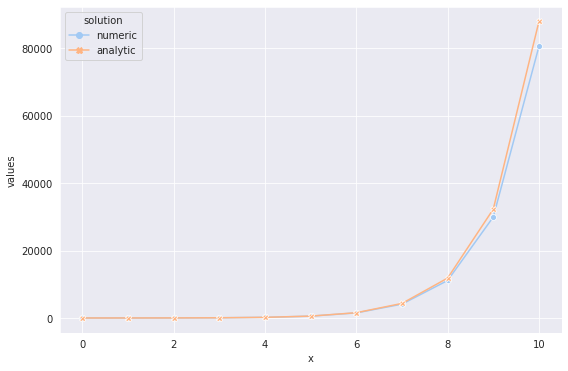

In [12]:
data = data_numeric.append(data_analytic, ignore_index=True)
sns.set_palette(sns.color_palette("pastel"))
plt.figure(figsize = (9,6))
sns.set_style('darkgrid')
ax = sns.lineplot(data=data, x="x", y="values", hue="solution", style="solution", markers=True, dashes=False)